# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

In [1]:
import numpy as np
import pandas as pd
import visuals as vs
from sklearn.cross_validation import ShuffleSplit

%matplotlib inline

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration

### Implementation: Calculate Statistics

In [2]:
minimum_price = min(data['MEDV'])

maximum_price = max(data['MEDV'])

mean_price = np.mean(data['MEDV'])

median_price = np.median(data['MEDV'])

std_price = np.std(data['MEDV'])

print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Feature Observation

1. RM - an increase in RM would intuitively result to an increase in MEDV because usually the more number of rooms, the bigger the house and the higher the value

2. LSTAT - an increase in LSTAT would intuitively  result to a decrease in MEDV because neighborhoods with people in lower class may often be associated with illegal/unsafe activities that can make the value of the house go down.

3.PTRATIO - an increase in PTRATIO would intuitively result to a decrease in MEDV because the lesser students per teacher, the better as there is more interaction to the teacher with a lower student-teacher ratio..thus an increase in PTRATIO can possible decrease the value of the house down.

These assumptions are justified in the graphs below

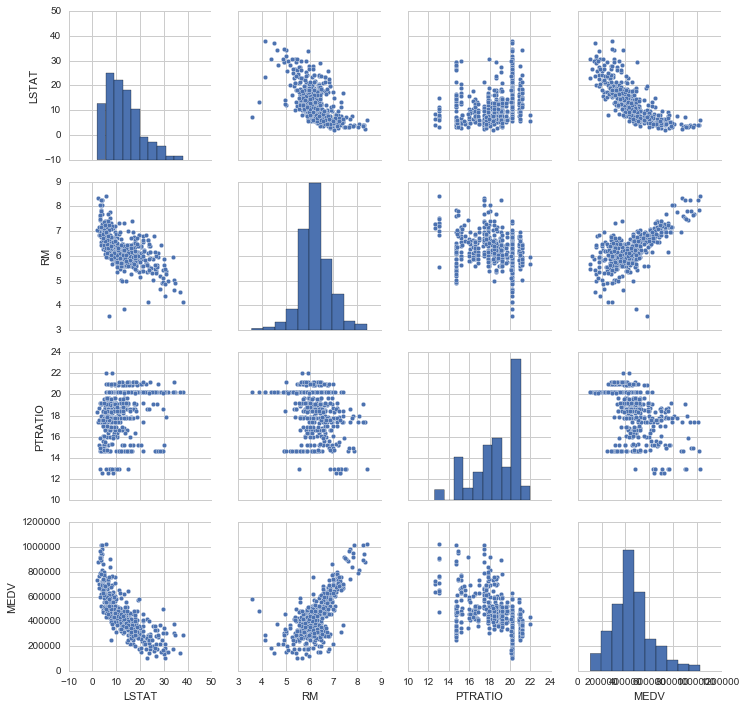

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT','RM','PTRATIO','MEDV']
sns.pairplot(data[cols],size=2.5)

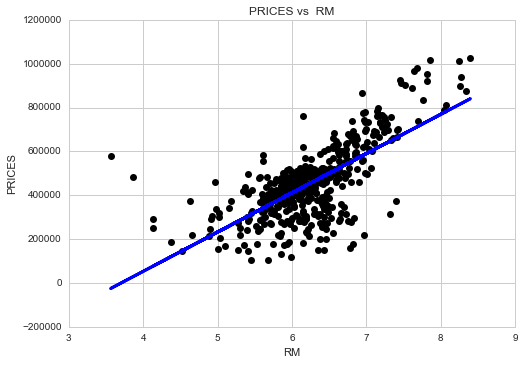

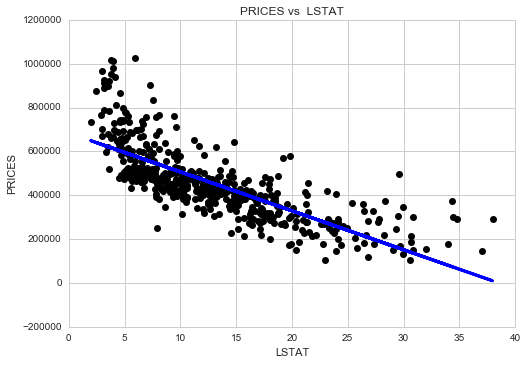

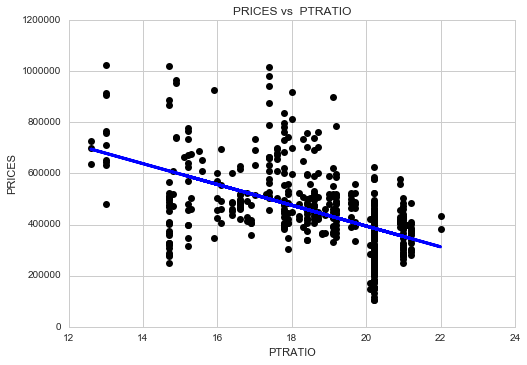

In [4]:
for col in features.columns:
    fig, ax = plt.subplots()
    fit = np.polyfit(features [col], prices, deg=1) # We use a linear fit to compute the trendline
    ax.scatter(features [col],  prices)
    plt.plot(features [col], prices, 'o', color='black')
    ax.plot(features[col], fit[0] * features[col] + fit[1], color='blue', linewidth=3) # This plots a trendline with the regression parameters computed earlier. We should plot this after the dots or it will be covered by the dots themselves
    plt.title('PRICES vs  '+ str(col)) 
    plt.xlabel(col) 
    plt.ylabel('PRICES') 

----

## Developing a Model

### Implementation: Define a Performance Metric

In [4]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    

    score = r2_score(y_true, y_predict)
    
    return score

### Goodness of Fit


| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

In [5]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


The coefficient of determination explains how much variance of the data is explained. Given that R squared ranges from 0 to 1, an R square of 0.923 has considerably captured the variation of the target variable

### Implementation: Shuffle and Split Data

In [6]:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10)


print "Training and testing split was successful."

Training and testing split was successful.


### Training and Testing


If you do not split the dataset to training and test, then there is no way to validate the model built. Not having to test the model means that it could easily be overfitting the train set and not able to generalize well to totally new data.

----

## Analyzing Model Performance

### Learning Curves

In [11]:
import visuals as vs

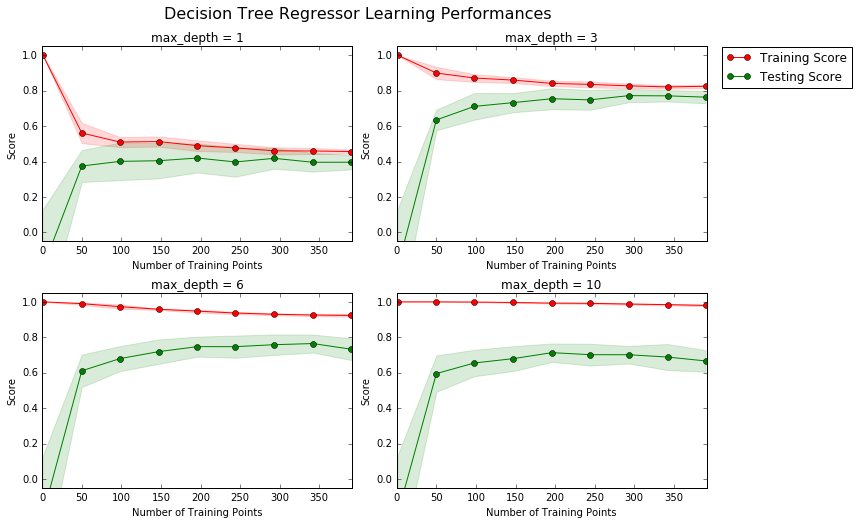

In [12]:

vs.ModelLearning(features, prices)

###Learning the Data

Max_Depth =3: As more training points are added, the score of the training curve is plateauing while the testing curve is slowly converging with the training curve at a score of 0.8. The current number of training points seem enough for both the curves to converge

### Complexity Curves

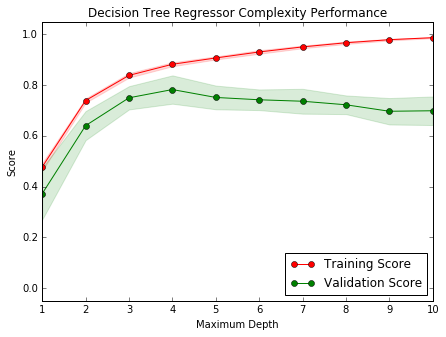

In [13]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff

When the model is trained with a maximum depth of 1, the model suffers from high bias - which means that the model is not complex enough to capture the underlying relationships thus giving it a score of only around 0.4 to 0.5. The model is underfitting. As for the maximum depth of 10, the model is overfitting and is suffering from high variance. This is given out by the split between the training score and the validation score. The training score is improving because the model is slowly 'memorizing' the training set, but when tested on validation - it fails because it is not able to generalize well on unseen data. You know when the model is suffering from high varaince when you test it on validation and the score is lower than what you would expect

### Best-Guess Optimal Model

Based on the graph, it is depth 4 because that is when the validation data score peaked before it started to slope downwards.

-----

## Evaluating Model Performance

### Grid Search

Because there are parameters to tune for different kind of models, the grid search helps in optimizing the algorithm through testing different combinations of the model parameters.There are two generic approaches to grid search:

1. Exhaustive grid search - this takes all the possible combinations between all the parameters specified. Because it is exhaustive this usually takes longer with a lot of compute time
2. Randomized grid search -  this implements a randomized search over parameters where each setting is sampled from a distribution over possible parameter values. This has two benefits over an exhaustive search. One is a budget can be chosen independent of the number of parameters and possible values. Two is adding parameters that do not influence the performance does not decrease efficiency.

http://scikit-learn.org/stable/modules/grid_search.html

### Cross-Validation

The k-fold cross validation training technique is you basically divide the training set with k number of folds and train with k-1 folds so you always have a fold to serve as your validation set. The cross validation process is then repeated k times with each of the k subsamples used exactly once as the validation data. The results from the k folds are then averaged to produce a single estimation.

https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation

This is important so that when you tune your model using grid search, you are, at the same time, making sure that the tuned parameters are not overfiting as shown in the previous graph. If you did a grid search then it will result to a max_depth of 10 but in reality if this is not tested on a validation set, you will not know that the best max_depth is actually 4.

This is also very useful when a dataset is limited in size because it allows for extensive exploitation of available data assessing the real potential of the algorithm in terms of the chosen performance metric


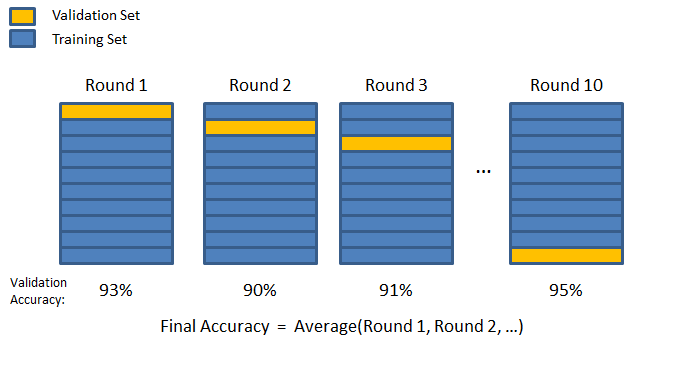

In [6]:
from IPython.display import Image
Image(filename='10_fold_cv.png', width=500) 

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [16]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator=regressor,param_grid = params,scoring = scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [17]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: 4, Because we did the grid search with a cross validation set, it was able to identify which hyperparameter gives the best model to generalize on new data

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [18]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $406,933.33
Predicted selling price for Client 2's home: $232,200.00
Predicted selling price for Client 3's home: $938,053.85


**Answer: I would recommend the following prices as predicted by the model:

Predicted selling price for Client 1's home: $406,933.33
Predicted selling price for Client 2's home: $232,200.00
Predicted selling price for Client 3's home: $938,053.85

Given the statistics calculated, these prices seem reasonable given the abovementioned features, no price extremely higher than the max and no price extremely lower than the min.

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [19]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: The constructed model should not be used in real-world setting. Data is no longer relevant today especially for features like neighborhood poverty level which is expected to change after 38 years. The features are not sufficient because there are certainly more factors being considered to price a home like commercial business around the area, accessibility to schools or public transpo, taxes, insurance, etc. And this model would not be applicable in rural areas where house prices are expected to be lower than the ones in urban areas. I think that this specific model would need more features and more data points to make it more robust. Other algorithms could also be tested to check if these could give a better score.